In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from scipy.stats import chi2_contingency


Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv("Hotel.csv")
df.head(20)

,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,month,date,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [3]:
df.shape

(36275, 19)

In [4]:
df.describe()

,n_adults,n_children,weekend_nights,week_nights,car_parking_space,lead_time,year,month,date,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [5]:
df.isnull().sum()

ID                                0
n_adults                          0
n_children                        0
weekend_nights                    0
week_nights                       0
meal_plan                         0
car_parking_space                 0
room_type                         0
lead_time                         0
year                              0
month                             0
date                              0
market_segment                    0
repeated_guest                    0
previous_cancellations            0
previous_bookings_not_canceled    0
avg_room_price                    0
special_requests                  0
status                            0
dtype: int64

In [6]:
duplicates = df.duplicated()
print(duplicates.any())

False


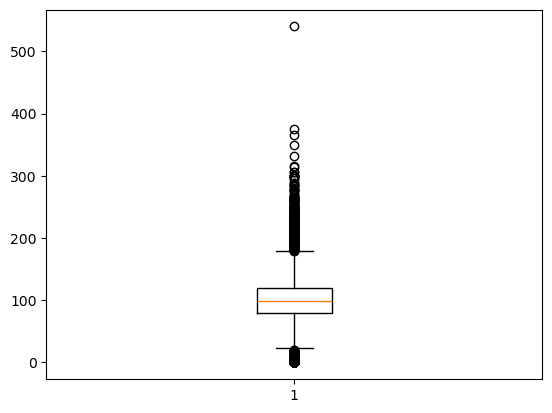

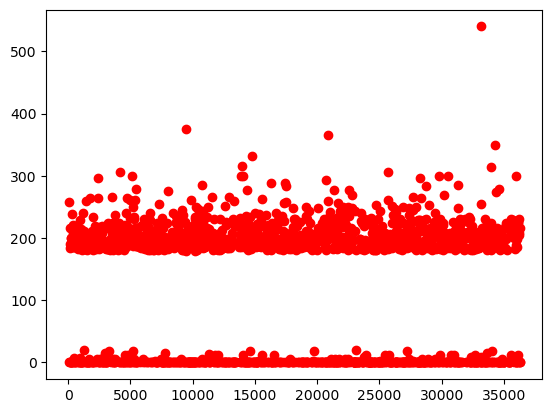

In [7]:
column_name = "avg_room_price"
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers as values outside the range (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR)
outliers = df[(df[column_name] < (Q1 - 1.5 * IQR)) | (df[column_name] > (Q3 + 1.5 * IQR))]
# Plot the data and highlight the outliers
plt.boxplot(df[column_name])
plt.show()
plt.scatter(x=outliers.index, y=outliers[column_name], color='red')
plt.show()

In [8]:
median = df['avg_room_price'].median()

df['avg_room_price'] = df['avg_room_price'].apply(
    lambda x: median if x > 500 else x
)

In [9]:
columns = ['meal_plan', 'room_type', 'market_segment']


unique_values = {col: df[col].unique() for col in columns}


for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}")

Unique values in 'meal_plan': ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
Unique values in 'room_type': ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
Unique values in 'market_segment': ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']


In [10]:
plan_order = ['Not Selected', 'Meal Plan 1', 'Meal Plan 2','Meal Plan 3']

ordinal_encoder = OrdinalEncoder(categories=[plan_order])
df['meal_plan'] = ordinal_encoder.fit_transform(df[['meal_plan']])

In [11]:
df.head()

,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,month,date,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status
0,INN00001,2,0,1,2,1.0,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,0.0,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,1.0,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,1.0,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,0.0,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [12]:
room_order = ['Room_Type 1','Room_Type 2','Room_Type 3','Room_Type 4','Room_Type 5','Room_Type 6','Room_Type 7']
ordinal_encoder = OrdinalEncoder(categories=[room_order])
df['room_type'] = ordinal_encoder.fit_transform(df[['room_type']])

In [13]:
df.head()

,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,month,date,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status
0,INN00001,2,0,1,2,1.0,0,0.0,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,0.0,0,0.0,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,1.0,0,0.0,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,1.0,0,0.0,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,0.0,0,0.0,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [14]:
df.rename(columns={'date': 'day'}, inplace=True)
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

In [15]:
df.head()

,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,month,day,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status,date
0,INN00001,2,0,1,2,1.0,0,0.0,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,0,2,3,0.0,0,0.0,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,0,2,1,1.0,0,0.0,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,0,2,1.0,0,0.0,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,0,1,1,0.0,0,0.0,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11


In [16]:
print("Columns before dropping:", df.columns)

df.drop(columns=['month', 'day'], inplace=True, errors='ignore')

print("Columns after dropping:", df.columns)
df.head()

Columns before dropping: Index(['ID', 'n_adults', 'n_children', 'weekend_nights', 'week_nights',
       'meal_plan', 'car_parking_space', 'room_type', 'lead_time', 'year',
       'month', 'day', 'market_segment', 'repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'avg_room_price', 'special_requests', 'status', 'date'],
      dtype='object')
Columns after dropping: Index(['ID', 'n_adults', 'n_children', 'weekend_nights', 'week_nights',
       'meal_plan', 'car_parking_space', 'room_type', 'lead_time', 'year',
       'market_segment', 'repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'avg_room_price', 'special_requests',
       'status', 'date'],
      dtype='object')


,ID,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status,date
0,INN00001,2,0,1,2,1.0,0,0.0,224,2017,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,0,2,3,0.0,0,0.0,5,2018,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,0,2,1,1.0,0,0.0,1,2018,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,0,2,1.0,0,0.0,211,2018,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,0,1,1,0.0,0,0.0,48,2018,Online,0,0,0,94.50,0,Canceled,2018-04-11


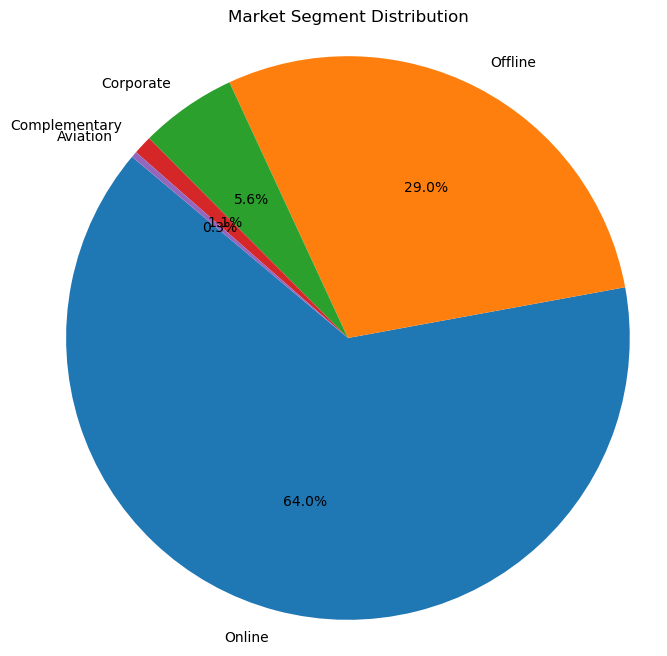

In [17]:
value_counts = df['market_segment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Segment Distribution')
plt.axis('equal')

plt.show()

Online sector is the biggest market place for the company followed by a significant contribution from the offline sector.

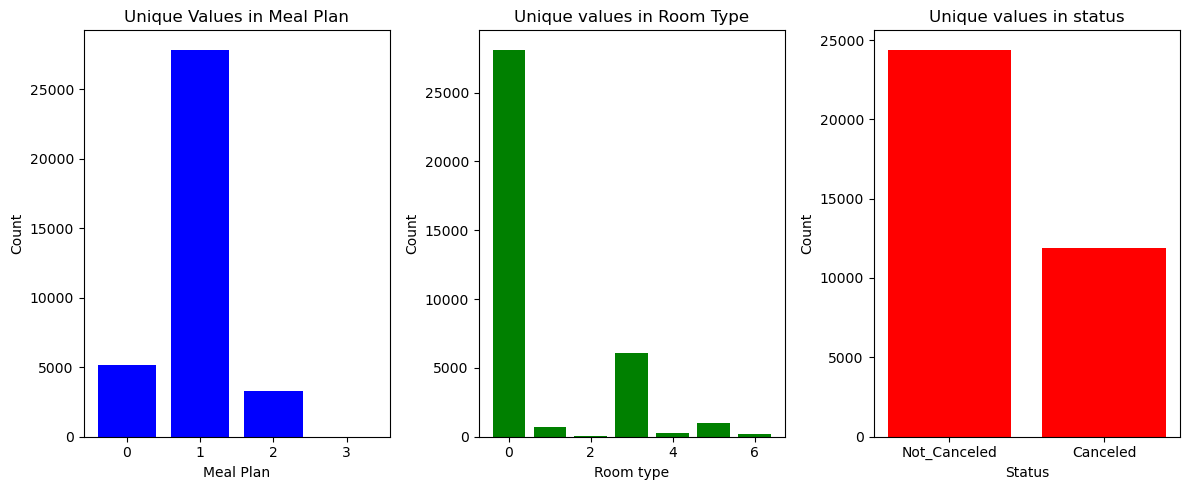

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
value_counts_meal_plan = df['meal_plan'].value_counts()
value_counts_room_type = df['room_type'].value_counts()
value_counts_status = df['status'].value_counts()

# First bar graph
axs[0].bar(value_counts_meal_plan.index, value_counts_meal_plan , color='b')
axs[0].set_title('Unique Values in Meal Plan')
axs[0].set_xlabel('Meal Plan')
axs[0].set_ylabel('Count')

# Second bar graph
axs[1].bar(value_counts_room_type.index, value_counts_room_type, color='g')
axs[1].set_title('Unique values in Room Type')
axs[1].set_xlabel('Room type')
axs[1].set_ylabel('Count')

axs[2].bar(value_counts_status.index, value_counts_status, color='r')
axs[2].set_title('Unique values in status')
axs[2].set_xlabel('Status')
axs[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


1. Most people prefer Meal Plan 1,  which suggests that it may be the most affordable and standard meal plan.
2. Room Type 1 is  highly preferred choice, suggesting it may be the most affordable
3. Though majority of the people do not cancel the booking, but still there are a large number of booking getting canceled that suggests that there maybe some trust issues among the consumers.

In [21]:
df['n_children'].value_counts()

n_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

In [22]:
df['n_adults'].value_counts()

n_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

In [23]:
bookings_with_no_children = df[(df['n_children'] == 0) & (df['n_adults'] == 2)]
num_bookings = bookings_with_no_children.shape[0]

print(f"Number of bookings with no children and two adults : {num_bookings}")

Number of bookings with no children and two adults : 23719


The above counts present that mostly two adults travel together which may be a couple, so there a high number of bookings from couples.

In [25]:
df['n_people'] = df['n_adults'] + df['n_children']
column = df.pop('n_people')

df.insert(1, 'n_people', column)
df.head()

,ID,n_people,n_adults,n_children,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status,date
0,INN00001,2,2,0,1,2,1.0,0,0.0,224,2017,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,2,0,2,3,0.0,0,0.0,5,2018,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,1,0,2,1,1.0,0,0.0,1,2018,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,2,0,0,2,1.0,0,0.0,211,2018,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,2,0,1,1,0.0,0,0.0,48,2018,Online,0,0,0,94.50,0,Canceled,2018-04-11


In [26]:
df.drop(columns = ['n_adults','n_children'],inplace = True)
df.head()

,ID,n_people,weekend_nights,week_nights,meal_plan,car_parking_space,room_type,lead_time,year,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status,date
0,INN00001,2,1,2,1.0,0,0.0,224,2017,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,2,3,0.0,0,0.0,5,2018,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,2,1,1.0,0,0.0,1,2018,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,0,2,1.0,0,0.0,211,2018,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,1,1,0.0,0,0.0,48,2018,Online,0,0,0,94.50,0,Canceled,2018-04-11


In [27]:
df['n_nights'] = df['weekend_nights'] + df['week_nights']
column = df.pop('n_nights')
df.insert(2, 'n_nights', column)

In [28]:
df.drop(columns = ['weekend_nights','week_nights'],inplace = True)
df.head()

,ID,n_people,n_nights,meal_plan,car_parking_space,room_type,lead_time,year,market_segment,repeated_guest,previous_cancellations,previous_bookings_not_canceled,avg_room_price,special_requests,status,date
0,INN00001,2,3,1.0,0,0.0,224,2017,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,INN00002,2,5,0.0,0,0.0,5,2018,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,INN00003,1,3,1.0,0,0.0,1,2018,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,INN00004,2,2,1.0,0,0.0,211,2018,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,INN00005,2,2,0.0,0,0.0,48,2018,Online,0,0,0,94.50,0,Canceled,2018-04-11


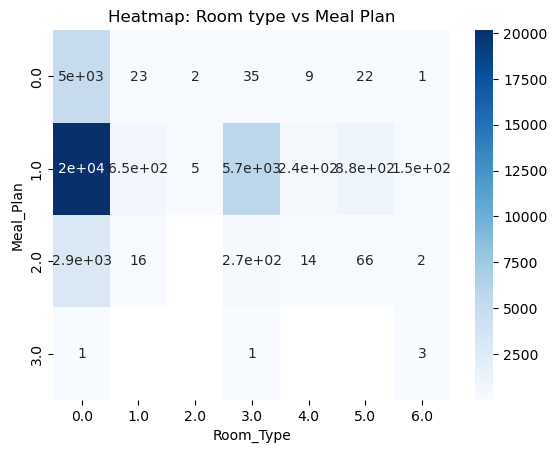

In [29]:
df_grouped = df.groupby(['meal_plan', 'room_type']).size().unstack()
sns.heatmap(df_grouped, annot=True, cmap='Blues')

plt.xlabel('Room_Type')
plt.ylabel('Meal_Plan')
plt.title('Heatmap: Room type vs Meal Plan')
plt.show()

1. The heatmap between room type and meal plan shows that mostly people opt for affordable options which is clearly seen by the intensity of cell combining meal plan 1 and room type 0.
2. Mostly, people select the meal plan 1 only and it does not depend on the type of room which may vary in their facilities and costs.

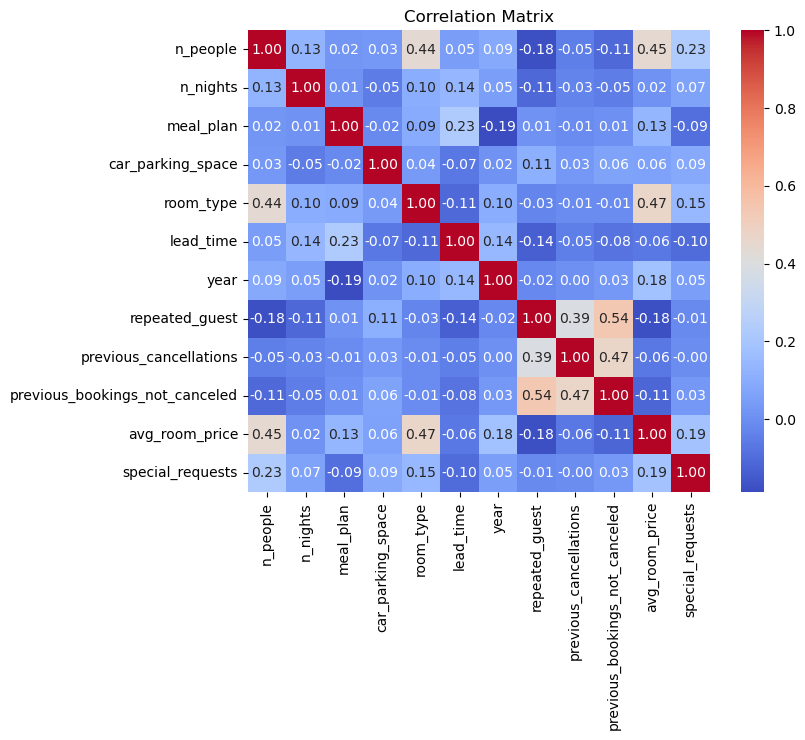

In [31]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

plt.title('Correlation Matrix')
plt.show()

1. The correlation matrix shows that none of the columns are too strongly dependant on one another, hence the factors affecting one of the values do not affect the other for a specific customer very strongly.
2. Repeated guest and previous booking not cancelled have a 0.54 correlation values which is very obvious.
3. Average room price and number of people have a moderate dependance on one another.
4. Room type and average room price are also dependant on one another but not very strongly.

In [33]:
chi2_stat, p_value, dof, expected = chi2_contingency(crosstab)
chi2_stat, p_value

NameError: name 'crosstab' is not defined

Since the p-value is much smaller than significance level (0.05), we can conclude that there is a statistically significant association between the market_segment and status columns.

In [ ]:
value_counts_repeated = df['repeated_guest'].value_counts()

print(value_counts_repeated)

In [ ]:
sns.barplot(x='market_segment', y='repeated_guest', data=df, estimator = sum)

plt.title('Bar Plot of market segment with repeated guests.')
plt.show()

1.The results here show that mostly people from the corporate segment are the repeated guests.People from aviation sector are not repeated as there are changes in working locations of people in this sector.
2. A large no. of people are still new guests which suggests that the customer retention rate is very poor . This could be due to the quality of rooms or food or other necessary services.



In [ ]:
statistics = df.groupby('year')['avg_room_price'].agg(['mean', 'median', 'std']).reset_index()

print(statistics)

In [ ]:

data_2017 = df[df['year'] == 2017]
mean_price = data_2017['avg_room_price'].mean()
median_price = data_2017['avg_room_price'].median()
plt.figure(figsize=(10, 6))
sns.histplot(data_2017['avg_room_price'], bins=20, kde=True)
plt.title('Histogram of Average Room Price for 2017')
plt.xlabel('Average Room Price')
plt.ylabel('Frequency')
plt.axvline(mean_price, color='red', linestyle='--', label='Mean')
plt.axvline(median_price, color='green', linestyle='--', label='Median')
plt.show()

In [ ]:
data_2018 = df[df['year'] == 2018]
mean_price = data_2018['avg_room_price'].mean()
median_price = data_2018['avg_room_price'].median()

plt.figure(figsize=(10, 6))
sns.histplot(data_2018['avg_room_price'], bins=20, kde=True)
plt.title('Histogram of Average Room Price for 2018')
plt.xlabel('Average Room Price')
plt.ylabel('Frequency')
plt.axvline(mean_price, color='red', linestyle='--', label='Mean')
plt.axvline(median_price, color='blue', linestyle='--', label='Median')
plt.show()

In [ ]:
year_counts = df['year'].value_counts()

print(year_counts)

The above histograms and the number of customers in 2017 and 2018 respectively give us the following conclusion
1. There has been a huge increase in the number of customers in 2018 compared to 2017, due to an increase in demand, and hence, the average price of the rooms has increased which is shown by an increase in the mean values of room price from 2017 to 2018.
2. With the increase in average room prices, there has not been an equal increase in the median room price which indicates that people prefer less costlier rooms for which they may compromise with the quality of room

In [ ]:
market_segment_counts = df.groupby(['year', 'market_segment']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=market_segment_counts, x='market_segment', y='count', hue='year', errorbar=None)

plt.title('Number of Bookings by Market Segment for 2017 and 2018')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

Conclusions from the above plot :
1. There has been an increase in booking from each market segment from 2017 and 2018 except aviation, which indiactes to focus on this market segment.
2. More number of people have started using online platforms with time leading to the greatest increase in online bookings.

In [ ]:
crosstab = pd.crosstab(df['market_segment'], df['status'])
print(crosstab)

The highest number of cancellations come from the online sector and offline sector which indicates that these are the areas that need to be worked upon. The observation from the pie chart above and the crosstab show that though the offline and online sectors contirbute the most to the number of bookings, but these bookings are also getting cancelled in nearly a same proportion.

In [ ]:
parking_counts = df['car_parking_space'].value_counts()

print(parking_counts)

1. The above table suggests that most people do not travel with a car and they prefer public transport much over private transport.

In [ ]:
df = pd.read_csv('Hotel.csv')

# Create a count plot for market segments with car parking space
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', hue='car_parking_space', palette='viridis')

plt.title('Number of Bookings by Market Segment and Car Parking Space')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend(title='Car Parking Space')
plt.tight_layout()
plt.show()

Though there has been a huge increase in bookings from 2017 to 2018, still there has not been a proportionate increase in the people opting for a car parking space, suggesting people still prefer public transport over private transport.